# **Jour 43 : MTCARS** 


La base de données **mtcars** est un jeu de données classique en statistique et en science des données. Elle provient de la revue Motor Trend US de 1974 et contient des informations sur 32 modèles de voitures. Chaque observation correspond à un modèle de voiture; le jeu de données comprend 11 variables décrivant des caractéristiques techniques et des performances de modèles de voiture. L’objectif de cette analyse est de mieux comprendre les relations entre les **caractéristiques des véhicules** et leur **consommation en carburant (mpg)**. 

$\bigoplus$ **Signification des variables**

+ mpg : Miles per gallon (consommation en miles par gallon, indicateur d’efficacité énergétique).
+ cyl : Nombre de cylindres du moteur (4, 6 ou 8).
+ disp : Cylindrée du moteur en pouces cubes.
+ hp : Puissance du moteur (horsepower, chevaux-vapeur).
+ drat : Ratio du pont arrière (rear axle ratio).
+ wt : Poids du véhicule (en 1000 livres).
+ qsec : Temps au quart de mile (temps en secondes pour parcourir 1/4 de mile).
+ vs : Type de moteur (0 = moteur en V, 1 = moteur en ligne).
+ am : Type de transmission (0 = automatique, 1 = manuelle).
+ gear : Nombre de vitesses de la boîte de transmission.
+ carb : Nombre de carburateurs.

## 0. Chargement des librairies 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

## 1. Chargement de la base de données

In [25]:
data = pd.read_csv("../data/mtcars.csv")

# les types de données
print(data.dtypes)

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object


In [26]:
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [27]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,32.0,20.090625,6.026948,10.400,15.42500,19.200,22.80,33.900
cyl,32.0,6.187500,1.785922,4.000,4.00000,6.000,8.00,8.000
disp,32.0,230.721875,123.938694,71.100,120.82500,196.300,326.00,472.000
hp,32.0,146.687500,68.562868,52.000,96.50000,123.000,180.00,335.000
drat,32.0,3.596563,0.534679,2.760,3.08000,3.695,3.92,4.930
wt,32.0,3.217250,0.978457,1.513,2.58125,3.325,3.61,5.424
qsec,32.0,17.848750,1.786943,14.500,16.89250,17.710,18.90,22.900
vs,32.0,0.437500,0.504016,0.000,0.00000,0.000,1.00,1.000
am,32.0,0.406250,0.498991,0.000,0.00000,0.000,1.00,1.000
gear,32.0,3.687500,0.737804,3.000,3.00000,4.000,4.00,5.000


In [28]:
# Nous allons exclure la colonne des noms de voitures pour les analyses
df = data.select_dtypes(include=[np.number])

In [29]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


## 2. Analyse exploratoire des données

### 2.1. Visualisation des distributions des variables 

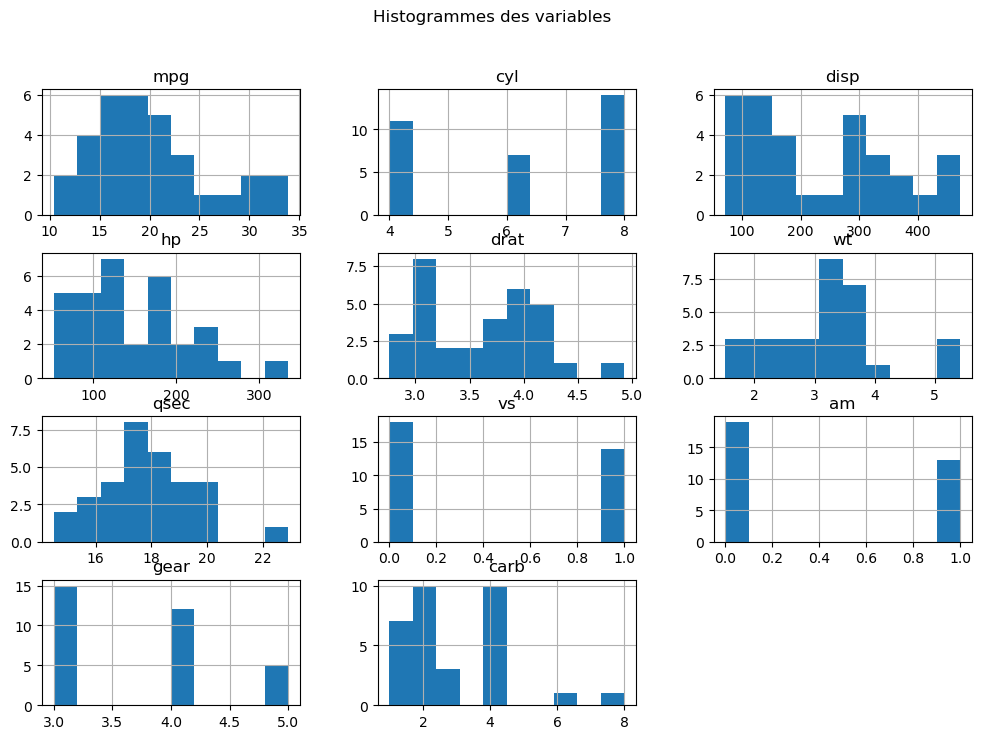

In [30]:
# Histogrammes des variables
df.hist(figsize=(12, 8), bins=10)
plt.suptitle("Histogrammes des variables")
plt.show()

In [31]:
results = []

# Test de normalité pour chaque variable (colonne)
for col in df.columns:
    stat, p_value = shapiro(df[col])
    results.append({'Variable': col, 'p-valeur': round(p_value, 4)})

# Résultat sous forme de DataFrame
result_df = pd.DataFrame(results)
print(result_df)

   Variable  p-valeur
0       mpg    0.1229
1       cyl    0.0000
2      disp    0.0208
3        hp    0.0488
4      drat    0.1101
5        wt    0.0927
6      qsec    0.5935
7        vs    0.0000
8        am    0.0000
9      gear    0.0000
10     carb    0.0004


Le test de normalité de Shapiro effectué révèle que seules les variables **cyl**, **disp**, **hp**, **vs**, **am**, **gear** et **carb** suivent une distribution normale.

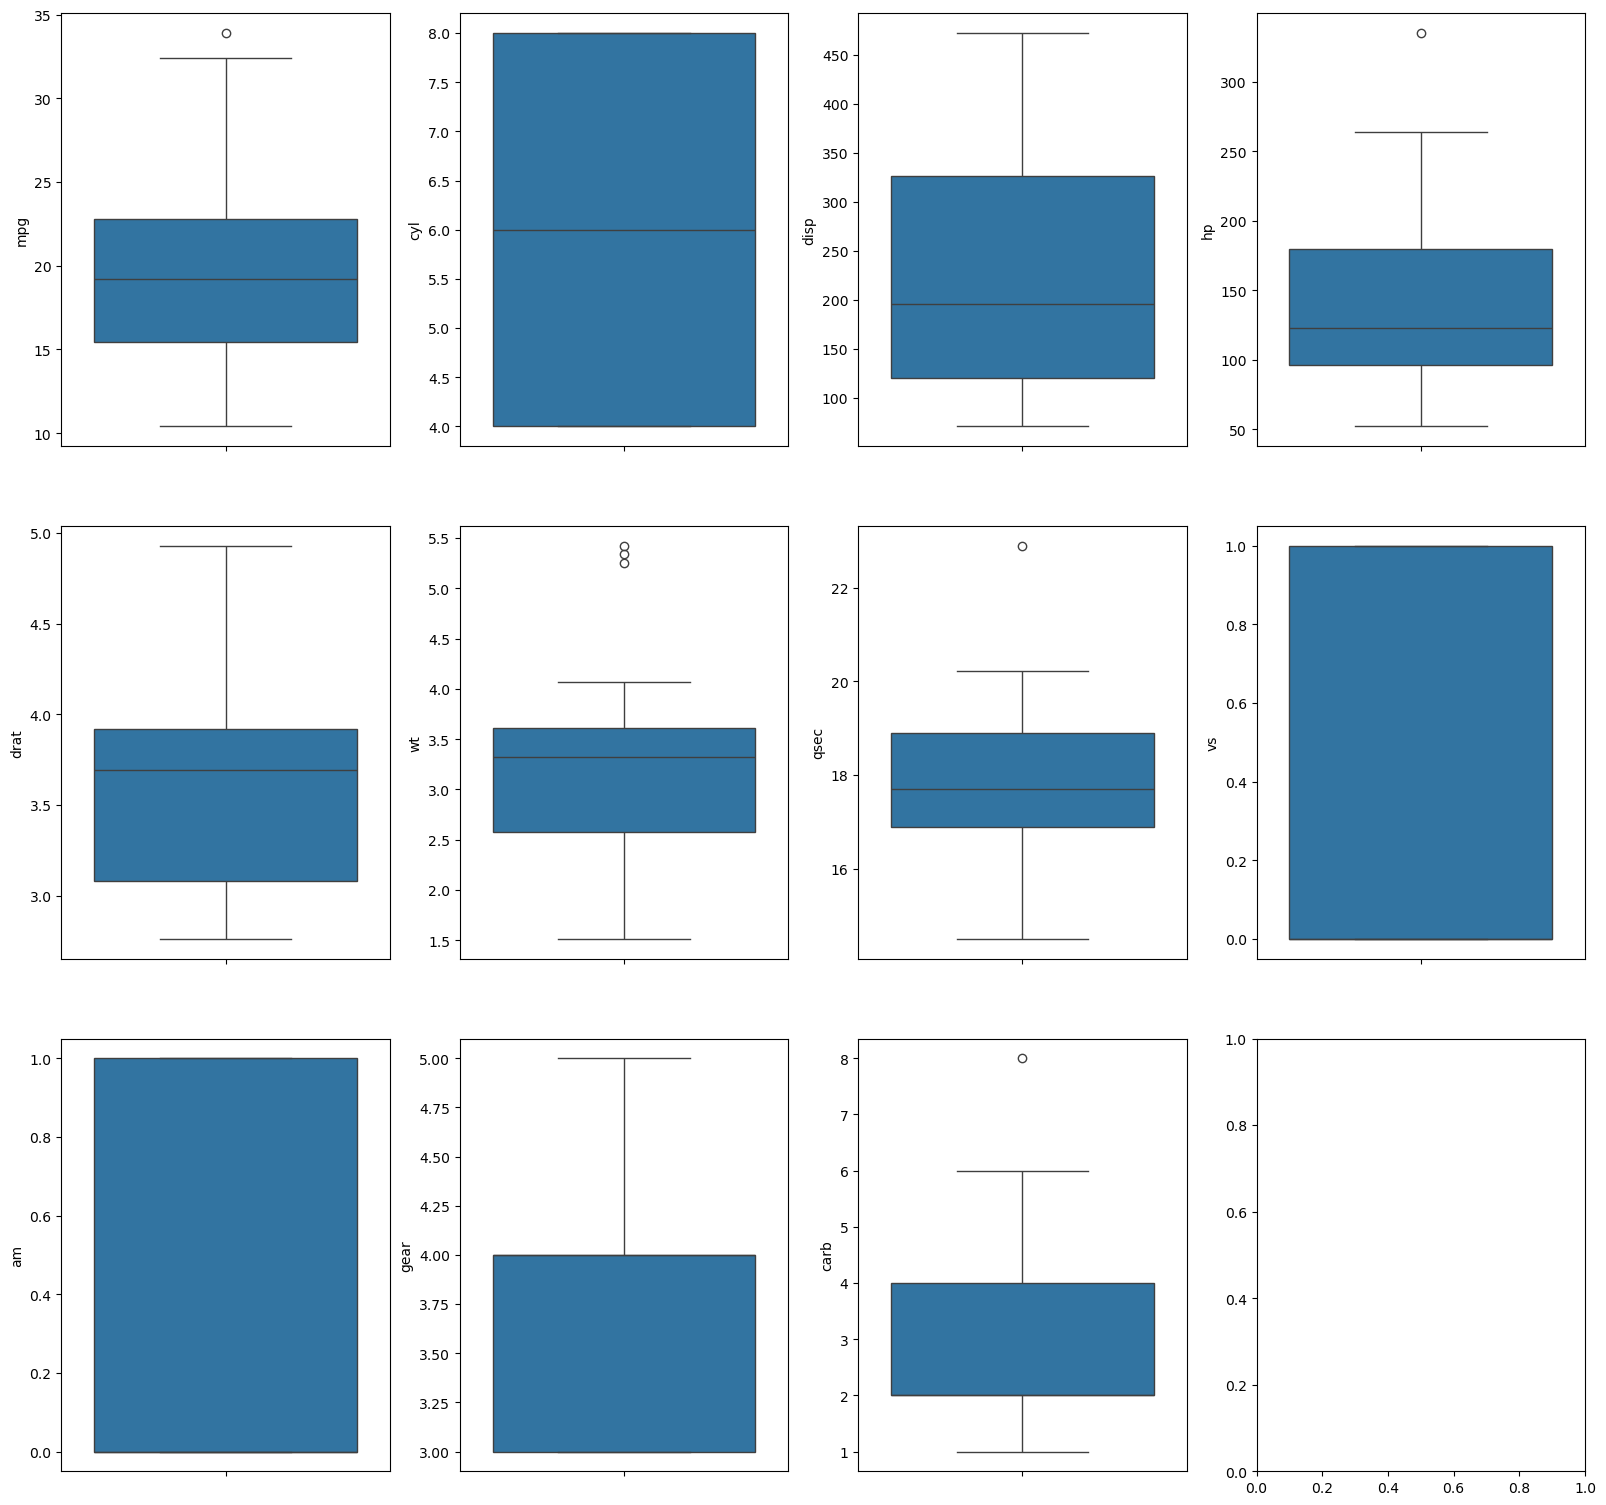

In [32]:
# Création de boxplots
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(16, 15))
index = 0
ax = ax.flatten()

for col, value in df.items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Les boxplots montrent une grande variabilité entre les données. Certaines variables, comme **hp**, **disp** et **wt**, présentent des valeurs extrêmes, tandis que d'autres, comme **mpg** ou **qsec**, sont plus symétriques. Les variables catégorielles ont peu de modalités. Cette visualisation permet d’identifier rapidement les outliers et la dispersion des données.

### 2.2. Analyse de quelques relations entre variables 

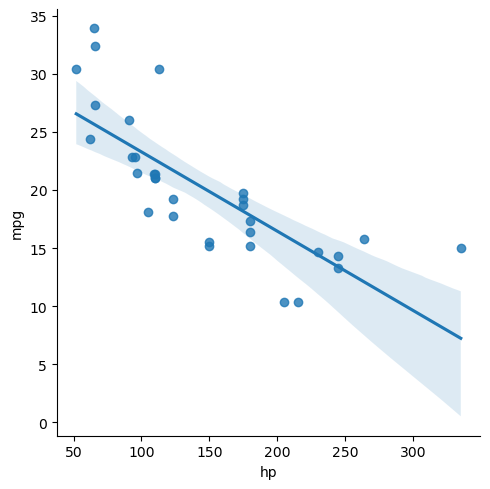

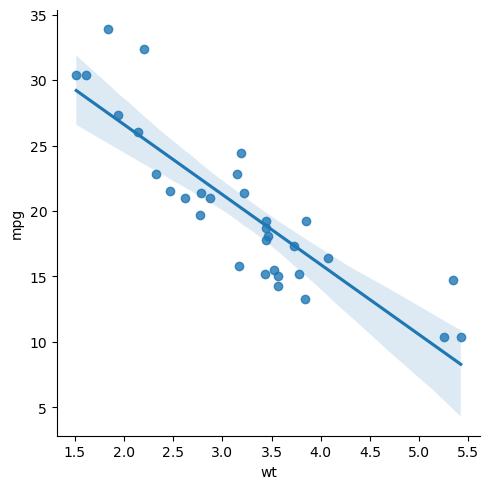

In [33]:
# Relation entre mpg et d'autres variables

sns.lmplot(x="hp", y="mpg", data=df)
sns.lmplot(x="wt", y="mpg", data=df)


Plus le poids du véhicule (**wt**) et la puissance du moteur (**hp**) sont importants plus la consommation en miles par gallon (**mpg**) est faible. Il y a donc une corrélation négative entre (**wt**, **hp**) et **mpg**.

## 3. Régression linéaire multiple

In [34]:
# les variables explicatives (X) et la variable cible (y)
X = df.drop(columns=["mpg"])  
y = df["mpg"]

# La constante pour l'intercept
X = sm.add_constant(X)

# Ajustement du modèle
model = sm.OLS(y, X).fit()

# Résumé du modèle
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           3.79e-07
Time:                        12:30:32   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

Presqu'aucune des variables n'est significative, on optera pour une régression pas à pas pour la suite de l'analyse afin de sélectionner les variables les plus pertinentes.

In [35]:
# Sélection des variables pertinentes par la Régression pas à pas (Backward Elimination)
import statsmodels.api as sm

def backward_elimination(data, target, significance_level=0.05):
    X = data.copy()
    X = sm.add_constant(X)  
    y = target
    model = sm.OLS(y, X).fit()
    
    while True:
        p_values = model.pvalues.drop("const")  
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            feature_to_remove = p_values.idxmax()
            X.drop(columns=[feature_to_remove], inplace=True)
            model = sm.OLS(y, X).fit()
        else:
            break

    return model

# Application de l'élimination pas à pas
final_model = backward_elimination(df.drop(columns=["mpg"]), df["mpg"])
print(final_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     52.75
Date:                Wed, 23 Apr 2025   Prob (F-statistic):           1.21e-11
Time:                        12:30:32   Log-Likelihood:                -72.060
No. Observations:                  32   AIC:                             152.1
Df Residuals:                      28   BIC:                             158.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6178      6.960      1.382      0.1

Par la régression pas à pas, il ressort finalement que les variables les plus pertinentes sont **wt**, **qsec** et **am** et expliquent **85%** de la variance de **mpg**.

## 4. Vérification des hypothèses 

### 4.1. Test de Normalité des erreurs

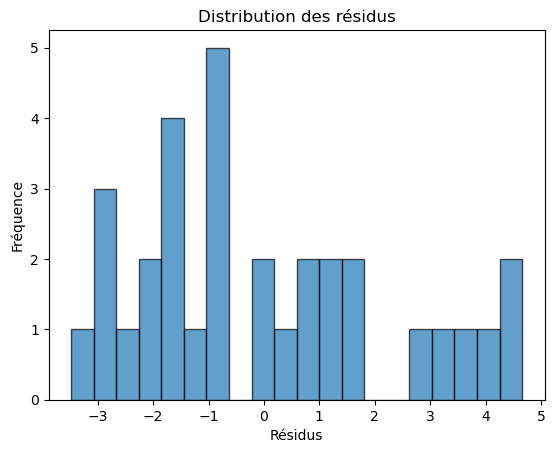

Test de Shapiro-Wilk: ShapiroResult(statistic=0.9410960255551162, pvalue=0.08042769363003151)


In [36]:
residuals = final_model.resid
from scipy.stats import shapiro

# Histogramme des résidus
plt.hist(residuals, bins=20, edgecolor="black", alpha=0.7)
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.show()

# Test de normalité de Shapiro-Wilk
print("Test de Shapiro-Wilk:", shapiro(residuals))


 La p-valeur du test de **Shapiro-Wilk** (0,0804) est > 0.05, alors on peut conclure que les résidus suivent une loi normale.

### 4.2. Homoscédasticité (test de Breusch-Pagan)

In [37]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, final_model.model.exog)
print(f"Test de Breusch-Pagan:, p-value={bp_test[1]:.3f}")


Test de Breusch-Pagan:, p-value=0.103


Avec une p-valeur de **0,103** (>0,05), les résidus sont homoscédastiques (variance constante).

## 5. Prédiction et évaluation du modèle

### 5.1. Prédiction

Nous avons une nouvelle voiture avec des caractéristiques spécifiques: wt = 2,62 (poids du véhicule), qsec = 16,62 (temps pour parcourir un quart de mile) et am = 1 (type de transmission : 0:automatique et 1:manuelle)

In [38]:
new_data = pd.DataFrame({
    'const': [1.0],
    'wt': [2.62],
    'qsec': [16.46],
    'am': [1],
})

# Ajout de la constante 
new_data = sm.add_constant(new_data)

# Notre prédiction
prediction = final_model.predict(new_data)
print(f"Prédiction de mpg : {prediction.iloc[0]:.2f}")


Prédiction de mpg : 22.47


### 5.2. Evaluation du modèle

In [39]:
from sklearn.metrics import mean_squared_error

# Erreur quadratique moyenne (MSE - Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)

# Calcul du Racine de l’erreur quadratique moyenne (RMSE - Root Mean Squared Error)
rmse = np.sqrt(mse)
print(f"RMSE : {rmse:.2f}")

RMSE : 3.18


L'objectif de cette analyse était de modéliser la consommation de carburant des voitures (**mpg**) à partir des caractéristiques mécaniques présentes dans la base (**mtcars**). Une régression pas à pas a été réalisée afin de sélectionner les variables explicatives les plus pertinentes. Le modèle final inclut les variables suivantes : **wt**, **qsec** et **am**. En utilisant ce modèle, une prédiction a été effectuée sur un véhicule ayant les caractéristiques suivantes : Poids (wt) = 2.62, qsec = 16.46 et Transmission manuelle (am = 1).

La consommation prédite est de **22.47 mpg**, en d'autres termes, elle pourrait parcourir **22.47 miles** (environ 36 km) avec un **gallon d’essence** (≈3.8 litres). C'est une consommation modérée car les voitures les plus efficaces de notre dataset peuvent atteindre jusqu'à **33,9 mpg** (max) et les moins efficaces descendent jusqu'à **10,4 mpg** (min), la moyenne étant autour de **20 mpg**.
Le modèle final présente une Racine de l’Erreur Quadratique Moyenne (**RMSE**) de **3.18**, ce qui signifie que les prédictions s’écartent en moyenne de **±3.18 unités** de **mpg** par rapport aux valeurs réelles. Cette précision est acceptable compte tenu de la complexité modérée du modèle et de la taille de l’échantillon (32 observations).

